<a href="https://colab.research.google.com/github/difinative/k8-performance-check/blob/main/SanuAlgo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!unzip /content/datas.zip -d /content/data

Archive:  /content/datas.zip
  inflating: /content/data/json/AB_20231109085452.json  
  inflating: /content/data/json/AB_20231109102131.json  
  inflating: /content/data/json/AB_20231109103355.json  
  inflating: /content/data/json/AB_20231109103717.json  
  inflating: /content/data/json/AB_20231109104555.json  
  inflating: /content/data/json/AB_20231109105433.json  
  inflating: /content/data/json/AB_20231109110253.json  


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [16]:
import os
import json
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

def load_data(folder_path):
    data_list = []
    for filename in os.listdir(folder_path):
        if filename.endswith(".json"):
            file_path = os.path.join(folder_path, filename)
            with open(file_path, 'r') as file:
                data_list.extend(json.load(file))
    return data_list

def manhattan_distance(query_vector, data_list):
    distance_scores = []
    for item in data_list:
        feature_vector = np.array(item["Feature Vector"])
        distance = np.sum(np.abs(query_vector - feature_vector))
        distance_scores.append((item, distance))
    return sorted(distance_scores, key=lambda x: x[1])

def vector_search(query_vector, data_list):
    similarity_scores = []
    for item in data_list:
        feature_vector = np.array(item["Feature Vector"])
        similarity = cosine_similarity([query_vector], [feature_vector])[0][0]
        similarity_scores.append((item, similarity))
    return sorted(similarity_scores, key=lambda x: x[1], reverse=True)

def pearson_correlation(query_vector, data_list):
    correlation_scores = []
    for item in data_list:
        feature_vector = np.array(item["Feature Vector"])
        correlation = np.corrcoef(query_vector, feature_vector)[0, 1]
        correlation_scores.append((item, correlation))
    return sorted(correlation_scores, key=lambda x: x[1], reverse=True)

def euclidean_distance(query_vector, data_list):
    distance_scores = []
    for item in data_list:
        feature_vector = np.array(item["Feature Vector"])
        distance = np.linalg.norm(query_vector - feature_vector)
        distance_scores.append((item, distance))
    return sorted(distance_scores, key=lambda x: x[1])

def perform_vector_search(folder_path, query_vector, top_results=10):
    all_data = load_data(folder_path)
    results = euclidean_distance(query_vector, all_data)


    # Print the top results
    #for result in results[:top_results]:
        #print(f"Similarity: {result[1]}, Original Text: {result[0]['Original Text']}")
    # Print the top results
    for result in results[:top_results]:
        print(f"Distance: {result[1]}, Original Text: {result[0]['Original Text']}")


In [2]:
!pip install easyocr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 24.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 57.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 34.6 MB/s eta 0:00:00


In [ ]:
import cv2
import torch
import torchvision.transforms as transforms
from torch import nn
from torchvision import models
import json
import time
import easyocr
from google.colab.patches import cv2_imshow

# Ask the user to upload an image
image_path = '/content/drive/MyDrive/OCR/1.jpg'

# Create a reader with the default recognition model for English.
reader = easyocr.Reader(['en'])

print("Default recognition model loaded successfully for English.")

# Read the image.
image = cv2.imread(image_path)
if image is None:
    raise ValueError(f"Unable to read the image from the path {image_path}.")

print("Image read successfully.")

# Initialize the ResNet model and load pre-trained weights.
resnet = models.resnet50(pretrained=True)
# Remove the final classification layer
resnet = nn.Sequential(*list(resnet.children())[:-1])
resnet.eval()  # Set the model to evaluation mode

# Define a transformation to preprocess the image for ResNet
preprocess = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Perform OCR on the image.
results = reader.readtext(image)

# Create a list to store the data for each bounding box
data_list = []

# Print bounding box coordinates and words detected, and display the extracted image patches
for i, (bbox, text, prob) in enumerate(results):
    # Convert bounding box coordinates to integers
    bbox = [(int(x), int(y)) for x, y in bbox]

    # Extract the image patch within the bounding box
    x1, y1 = bbox[0]
    x2, y2 = bbox[2]
    patch = image[y1:y2, x1:x2]

    # Display the extracted image patch using cv2_imshow
    cv2_imshow(patch)

    # Preprocess the patch for ResNet
    patch = cv2.cvtColor(patch, cv2.COLOR_BGR2RGB)
    patch = preprocess(patch)
    patch = patch.unsqueeze(0)  # Add batch dimension

    # Extract features from the last but one layer of ResNet
    with torch.no_grad():
        features = resnet(patch)

    # Print the extracted feature vector
    print(f"Feature Vector: {features.squeeze().tolist()}")

    # Example usage
    folder_path = "/content/drive/MyDrive/OCR/output_images_data"
    query_vector = features.squeeze().tolist()  # Replace with your actual query vector
    perform_vector_search(folder_path, query_vector)

print("OCR process completed.")


testing hindi

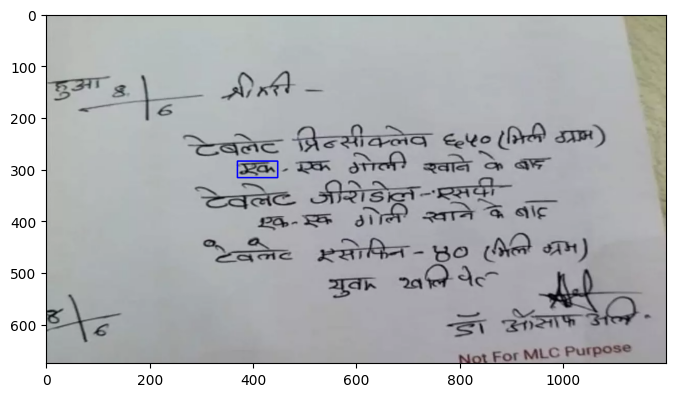

In [ ]:

import matplotlib.pyplot as plt
import cv2
import easyocr
from pylab import rcParams
from IPython.display import Image

rcParams['figure.figsize'] = 8, 16

reader = easyocr.Reader(['en', 'hi'])
file_name = "/content/drive/MyDrive/OCR/parchi1.jpg"
Image(file_name)
output = reader.readtext(file_name)
output
cord = output[4][0]
x_min, y_min = [int(min(idx)) for idx in zip(*cord)]
x_max, y_max = [int(max(idx)) for idx in zip(*cord)]
image = cv2.imread(file_name)
cv2.rectangle(image,(x_min,y_min),(x_max,y_max),(255,0,0),2)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

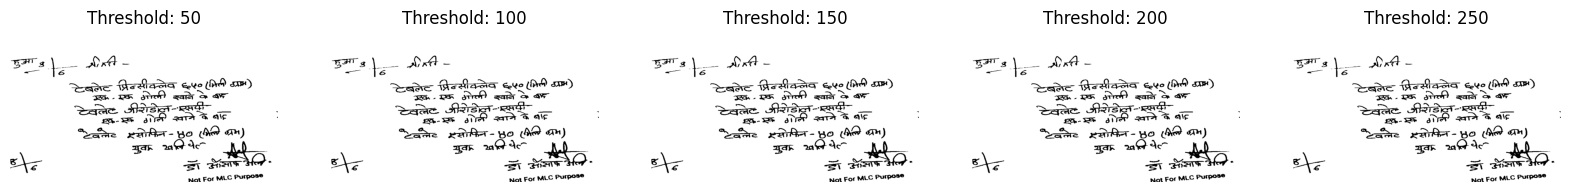

[([[2, 113], [169, 113], [169, 173], [2, 173]], 'रूमा ,', 0.031738000336638976), ([[408, 108], [484, 108], [484, 160], [408, 160]], 'रर', 0.7081186888802808), ([[266, 202], [873, 202], [873, 289], [266, 289]], 'टबलेट प्रिन्सवलेव ९e५०', 0.2234378619338045), ([[980, 208], [1090, 208], [1090, 264], [980, 264]], 'ठ्रम )', 0.4246201576221098), ([[369, 281], [459, 281], [459, 317], [369, 317]], 'Z ', 0.2363061704783096), ([[477, 275], [557, 275], [557, 315], [477, 315]], 'रफक', 0.21512165083053006), ([[572, 257], [892, 257], [892, 321], [572, 321]], 'ठगलम  चवान क', 0.012681907462012922), ([[287, 315], [561, 315], [561, 429], [287, 429]], 'टेवलेट फँ', 0.0783452443611993), ([[498, 297], [921, 297], [921, 426], [498, 426]], 'ओीरेडल्ल त्ेर्रै ', 0.010839505375201201), ([[902, 354], [988, 354], [988, 402], [902, 402]], 'slट', 0.4615609163556728), ([[312, 430], [484, 430], [484, 486], [312, 486]], 'वल्ट', 0.4011121094226837), ([[519, 427], [827, 427], [827, 489], [519, 489]], 'रतपित - ४०', 0.25066

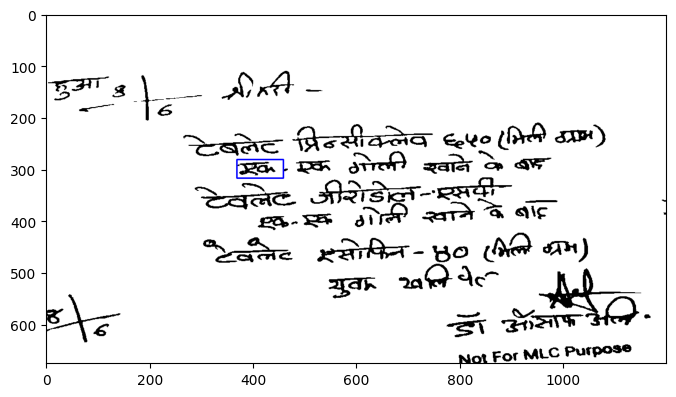

In [ ]:
import matplotlib.pyplot as plt
import cv2
import easyocr
import numpy as np
from pylab import rcParams

# Set the size for matplotlib plot
rcParams['figure.figsize'] = 8, 16

# Initialize the OCR reader
reader = easyocr.Reader(['en', 'hi'])

# Replace with your image path
file_name = "/content/drive/MyDrive/OCR/ParchiSharp.png"

# Read the image
image = cv2.imread(file_name)

# Convert to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Applying a range of binary thresholds
threshold_values = [50, 100, 150, 200, 250]
fig, axs = plt.subplots(1, len(threshold_values), figsize=(20,5))

for i, thresh in enumerate(threshold_values):
    # Apply binary threshold
    _, thresh_image = cv2.threshold(gray_image, thresh, 255, cv2.THRESH_BINARY)

    # Display the thresholded image
    axs[i].imshow(cv2.cvtColor(thresh_image, cv2.COLOR_BGR2RGB))
    axs[i].title.set_text(f'Threshold: {thresh}')
    axs[i].axis('off')

plt.show()

# OCR on the original image
output = reader.readtext(file_name)
print(output)

# Highlight the detected area on the original image
cord = output[4][0]
x_min, y_min = [int(min(idx)) for idx in zip(*cord)]
x_max, y_max = [int(max(idx)) for idx in zip(*cord)]
cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (255, 0, 0), 2)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()


In [19]:
import cv2
import torch
import torchvision.transforms as transforms
from torch import nn
from torchvision import models
import json
import os
import easyocr

# Initialize the ResNet model and load pre-trained weights.
resnet = models.resnet50(pretrained=True)
# Remove the final classification layer
resnet = nn.Sequential(*list(resnet.children())[:-1])
resnet.eval()  # Set the model to evaluation mode

# Define a transformation to preprocess the image for ResNet
preprocess = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Function to extract features from an image patch using ResNet
def extract_features(patch):
    # Preprocess the patch for ResNet
    patch = cv2.cvtColor(patch, cv2.COLOR_BGR2RGB)
    patch = preprocess(patch)
    patch = patch.unsqueeze(0)  # Add batch dimension

    # Extract features from the last but one layer of ResNet
    with torch.no_grad():
        features = resnet(patch)

    return features.squeeze().tolist()

# Directory containing image files
image_dir = '/content/drive/MyDrive/OCR/output_images'

# Directory to save JSON files
json_dir = '/content/drive/MyDrive/OCR/output_images_data'

# Create the output directory if it doesn't exist
os.makedirs(json_dir, exist_ok=True)

# Initialize EasyOCR reader for English
reader = easyocr.Reader(['en'])

# Iterate over all image files in the directory
for filename in os.listdir(image_dir):
    if filename.endswith(('.jpg', '.png', '.jpeg')):  # Filter image files
        image_path = os.path.join(image_dir, filename)
        image = cv2.imread(image_path)

        # Perform OCR on the image
        results = reader.readtext(image)

        # Create a list to store data for each bounding box
        data_list = []

        # Process detected text regions
        for i, (bbox, text, prob) in enumerate(results):
            # Convert bounding box coordinates to integers
            bbox = [(int(x), int(y)) for x, y in bbox]

            # Extract the image patch within the bounding box
            x1, y1 = bbox[0]
            x2, y2 = bbox[2]
            patch = image[y1:y2, x1:x2]

            # Extract features from the patch
            features = extract_features(patch)

            # Create a data entry with text label and features
            data_entry = {
                "Image source": filename,
                "Original Text": text,
                "Feature Vector": features
            }

            data_list.append(data_entry)

        # Create a JSON file for this image
        json_filename = os.path.splitext(filename)[0] + '.json'
        json_path = os.path.join(json_dir, json_filename)

        with open(json_path, 'w') as json_file:
            json.dump(data_list, json_file)

        print(f"Processed: {image_path} and saved as {json_path}")

print("Data generation completed.")


Processed: /content/drive/MyDrive/OCR/output_images/118 SOLVENT_variation_2.png and saved as /content/drive/MyDrive/OCR/output_images_data/118 SOLVENT_variation_2.json
Processed: /content/drive/MyDrive/OCR/output_images/118 SOLVENT_variation_3.png and saved as /content/drive/MyDrive/OCR/output_images_data/118 SOLVENT_variation_3.json
Processed: /content/drive/MyDrive/OCR/output_images/118 SOLVENT_variation_4.png and saved as /content/drive/MyDrive/OCR/output_images_data/118 SOLVENT_variation_4.json
Processed: /content/drive/MyDrive/OCR/output_images/118 SOLVENT_variation_5.png and saved as /content/drive/MyDrive/OCR/output_images_data/118 SOLVENT_variation_5.json
Processed: /content/drive/MyDrive/OCR/output_images/118 solvent_variation_6.png and saved as /content/drive/MyDrive/OCR/output_images_data/118 solvent_variation_6.json
Processed: /content/drive/MyDrive/OCR/output_images/118 SOLVENT_variation_7.png and saved as /content/drive/MyDrive/OCR/output_images_data/118 SOLVENT_variation

KeyboardInterrupt: ignored

In [20]:
!ls -l /content/drive/MyDrive/OCR/output_images |more


total 209931
-rw------- 1 root root  96552 Nov  2 14:53 110MM DM BEND 45 DEGREE (DRAIN_variation_0.png
-rw------- 1 root root 102512 Nov  2 14:53 110MM DM BEND 45 DEGREE (DRAIN_variation_1.png
-rw------- 1 root root  88905 Nov  2 14:53 110mm dm bend 45 degree (drain_variation_2.png
-rw------- 1 root root  92919 Nov  2 14:53 110mm dm bend 45 degree (drain_variation_3.png
-rw------- 1 root root  88427 Nov  2 14:53 110mm dm bend 45 degree (drain_variation_4.png
-rw------- 1 root root  93563 Nov  2 14:53 110MM DM BEND 45 DEGREE (DRAIN_variation_5.png
-rw------- 1 root root  95265 Nov  2 14:53 110mm dm bend 45 degree (drain_variation_6.png
-rw------- 1 root root  90814 Nov  2 14:53 110mm dm bend 45 degree (drain_variation_7.png
-rw------- 1 root root  99741 Nov  2 14:53 110MM DM BEND 45 DEGREE (DRAIN_variation_8.png
-rw------- 1 root root 102853 Nov  2 14:53 110MM DM BEND 45 DEGREE (DRAIN_variation_9.png
-rw------- 1 root root 101883 Nov  2 14:53 110MM DM BEND 87.5 DEGREE (DRAIN MASTER)_var

KeyboardInterrupt: ignored